Tracking Tongue Tip

2D Implementation of algorithm described in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8299742/#S7 under section "Extracting 3D tongue kinematics"

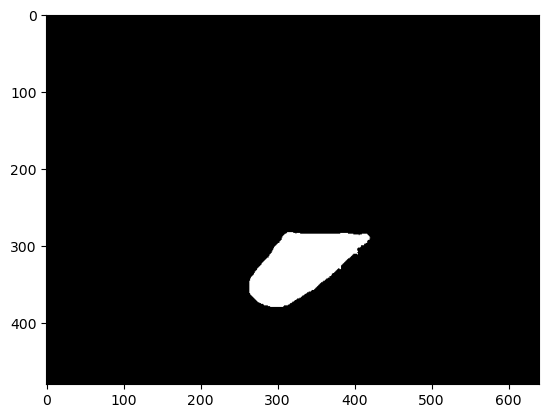

In [25]:
from matplotlib import pyplot as plt

img_path = "./data/maskoutput.png"
img = plt.imread(img_path).astype(bool)

plt.imshow(img, cmap="gray")

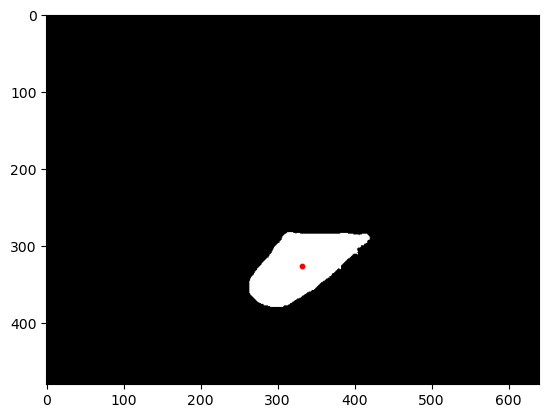

In [26]:
import numpy as np 

# get centroid c1 as COM of the whole mask
mask = np.column_stack(np.where(img > 0)[::-1])
c1 = np.mean(mask, axis=0)

plt.imshow(img, cmap="gray")
plt.scatter(x = c1[0], y = c1[1], c = "r", s = 10);


In [27]:
dists = np.linalg.norm(c1 - mask, axis=1)

# 75th percentile distance from c1
dist75 = int(sorted(dists)[int(0.75 * len(dists))])
print(dist75)

52


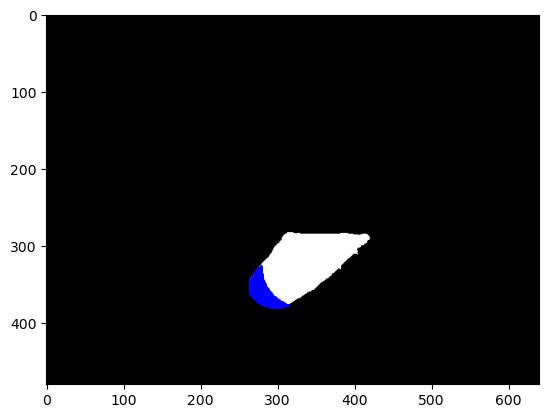

In [28]:


# def angle_between(v1, v2):
#     return np.degrees(np.math.atan2(np.linalg.det([v1,v2]),np.dot(v1,v2)))
#     #return np.degrees(np.math.acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))

# v1 as intial vector in direction of tongue
v1 = np.array([-1, 1])

# candidate set 1 as pixels farther than dist75 and within 45 deg of v1
cand1 = list(filter(lambda p : np.linalg.norm(v1 - (p-c1)) > dist75 and vg.angle(np.append(p-c1, 0), np.append(v1, 0)) < 45, mask))

plt.imshow(img, cmap="gray")
for x, y in cand1:
    plt.scatter(x = x, y = y, c = "b", s = 1);

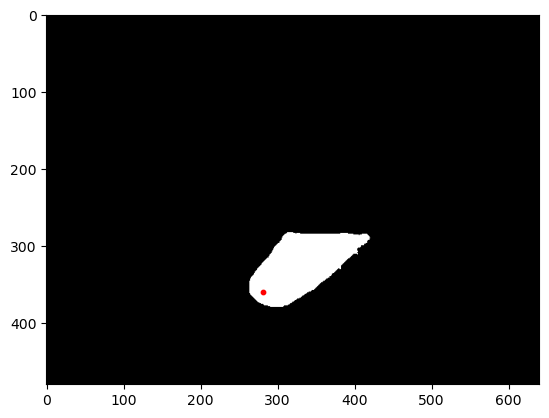

In [29]:
# c2 as centroid (COM) of cand1
c2 = np.mean(cand1, axis=0) 

plt.imshow(img, cmap="gray")
plt.scatter(x = c2[0], y = c2[1], c = "r", s = 10);

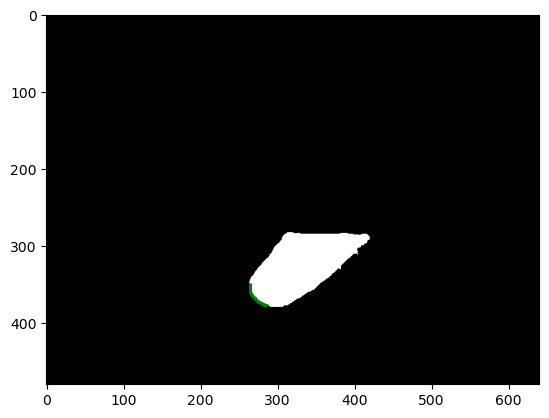

In [30]:
def is_boundary(img, p):
    if img[p[1]][p[0]] == 0:
        return False
    for dy in range(-1, 2):
        for dx in range(-1, 2):
            if p[0]+dx<img.shape[1] and p[1]+dy<img.shape[0] and p[0]+dx>=0 and p[1]+dy>=0 and img[p[1] + dy][p[0] + dx] == 0:
                return True
    return False

# v2 as new search vector
v2 = c2 - c1

# candidate set 2 as pixels within 15 deg of v2 and on boundary
cand2 = list(filter(lambda p : vg.angle(np.append(p-c1, 0), np.append(v2, 0)) < 15 and is_boundary(img, p), cand1))

plt.imshow(img, cmap="gray")
for x, y in cand2:
    plt.scatter(x = x, y = y, c = "g", s = 1);

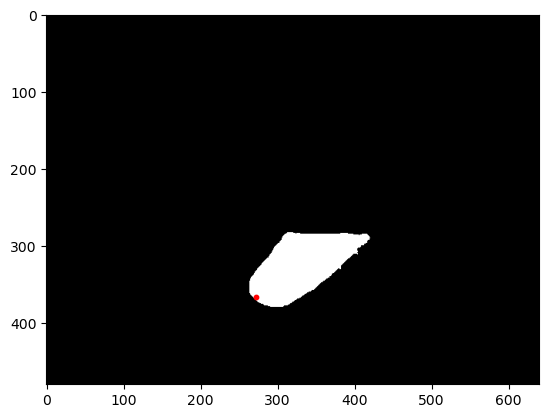

In [31]:
# tongue tip is centroid (COM) of cand2
tip = np.mean(cand2, axis=0) 
plt.imshow(img, cmap="gray")
plt.scatter(x = tip[0], y = tip[1], c = "r", s = 10);